# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Jacopo De Stefani - __[Jacopo.De.Stefani@ulb.ac.be](mailto:Jacopo.De.Stefani@ulb.ac.be)__
### Théo Verhelst - __[Theo.Verhelst@ulb.ac.be](mailto:Theo.Verhelst@ulb.ac.be)__
### Gianluca Bontempi - __[gbonte@ulb.ac.be](mailto:gbonte@ulb.ac.be)__

## TP 3 - Predictions: Tree-based methods

####  March 23, 2021

#### Materials originally developed by *Bertrand Lebichot, Jacopo De Stefani and Gianluca Bontempi*

## Preliminaries

### Supervised learning

The process of supervised learning involves the presence of an entity (the learner, also called prediction model), whose goal is to learn the mapping between inputs and outputs in a given problem.

A supervised learning problem can formulated as follows:

\begin{equation*}
 y = m(\mathbf{x})  
\end{equation*}

where:
- $y$ represents the output variable (also called target)
- $\mathbf{x}$ represents the vector of inputs (also called features).
- $m$ is the (unknown) mapping between input and outputs.

In the majority of the supervised learning problems, the mapping $m$ between input and outputs is unknown and needs to be estimated on basis of the available input/output observation pairs $(\mathbf{x}_i,y_i)$.

## Classification vs regression

Both classification and regression are sub-fields of *supervised learning*. In the two cases, we have predictive variables $\mathbf{x}$ and a target variable $y$. 
The main difference betweet the two type of problems is the type of the target variabile:

- In classification, $y$ is a discrete variable; i.e $y \in \{C_1,\cdots,C_k\}$
- In regression, $y$ is a continuous variable; i.e $y \in \mathbb{R}$

In this practical, in order to better understand the classification process, we will tackle the simplest classification case, with $k=2$ possible output classes (called binary classification).

The goal of our approach is to be able to learn the mapping between the input features and the predefined discrete output classes, in order to be able to perform an automatic classification, based on the available data. 



Let's illustrate the problem with a simple example :
* Knowing the two abstract features $X_1$ and $X_2$, and $n=6$ samples for both class (the red class and the blue class), can you predict the label for the green sample ?


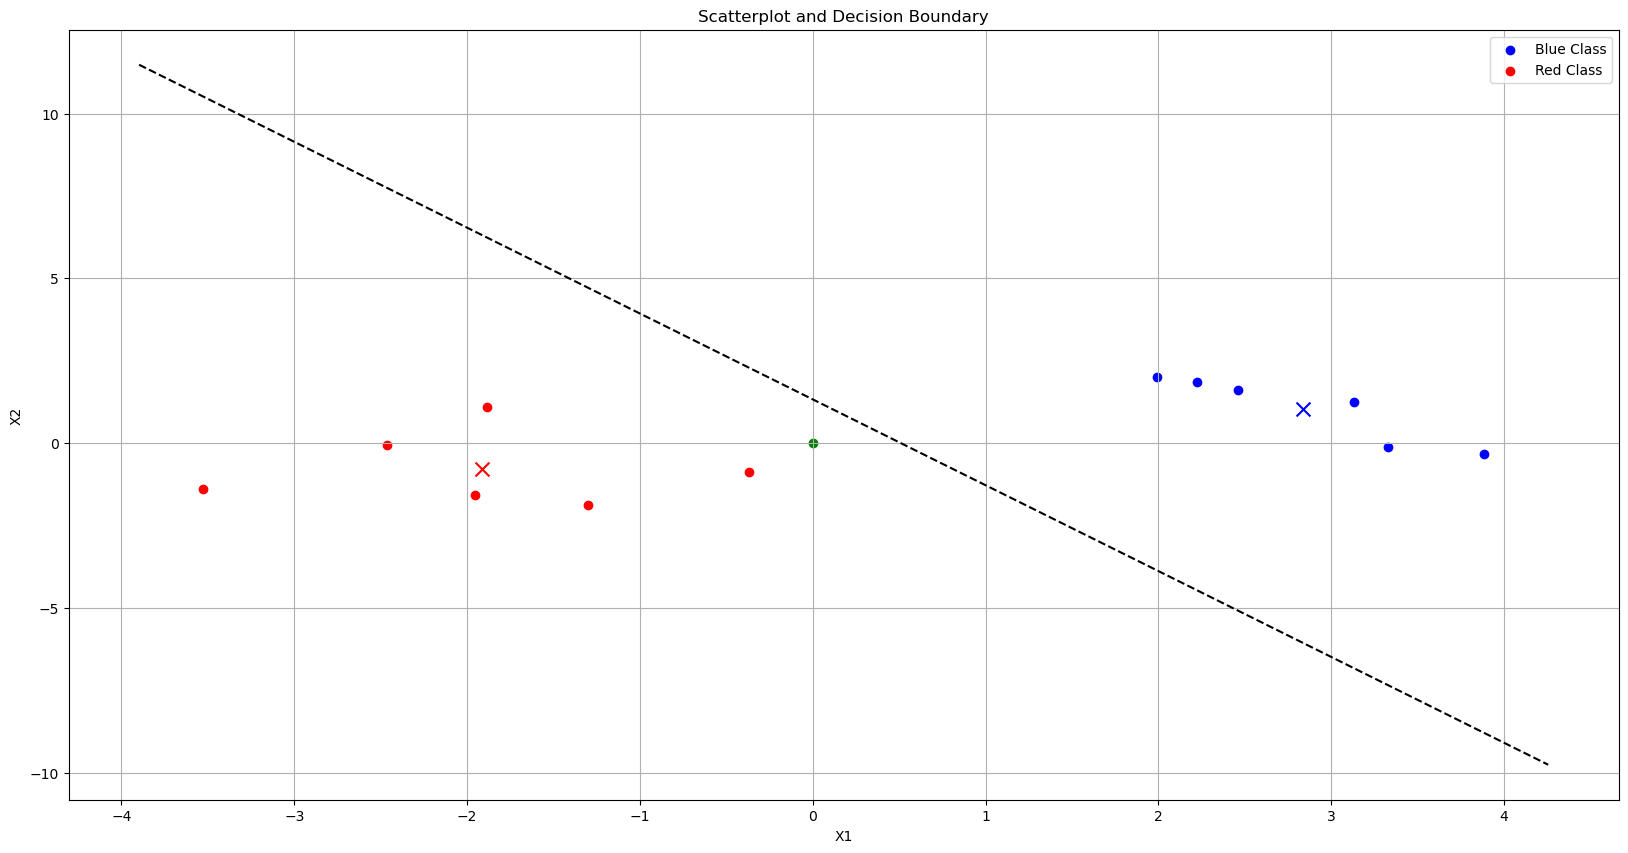

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 6

# Generate blue class data
X1_blue = np.random.normal(loc=+2, scale=1, size=n)
X2_blue = np.random.normal(loc=+1, scale=1, size=n)
SamplesBLUE = np.column_stack((X1_blue, X2_blue))
gBLUE = SamplesBLUE.mean(axis=0)

# Generate red class data
X1_red = np.random.normal(loc=-2, scale=1, size=n)
X2_red = np.random.normal(loc=-1, scale=1, size=n)
SamplesRED = np.column_stack((X1_red, X2_red))
gRED = SamplesRED.mean(axis=0)

# Plotting the scatter plot
plt.figure(figsize=(20, 10))
plt.scatter(SamplesBLUE[:, 0], SamplesBLUE[:, 1], color='blue', label='Blue Class')
plt.scatter(SamplesRED[:, 0], SamplesRED[:, 1], color='red', label='Red Class')
plt.scatter(0, 0, color='green')  # example point in green

# Plot centroids
plt.scatter(gBLUE[0], gBLUE[1], color='blue', marker='x', s=100)
plt.scatter(gRED[0], gRED[1], color='red', marker='x', s=100)

# Draw decision boundary
mid_point = (gRED + gBLUE) / 2
slope = -(gBLUE[0] - gRED[0]) / (gBLUE[1] - gRED[1])
intercept = mid_point[1] - slope * mid_point[0]
x_vals = np.array(plt.gca().get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, 'k--')

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Scatterplot and Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()


## Classification metrics

### Confusion Matrix 

A confusion matrix $\mathbf{C}$ is a $k \times k$ matrix containing the classifications statistics of a given classifier.
$c_{ij}$ containes the number of times that a sample belonging to the actual class $j$ has been predicted as belonging to class $i$.

In our two-class setting, the confusion matrix (reporting the number of actual class / predicted class) has four entries:
 
|            | Actual Negative   | Actual Positive  |
|:----------:|-------------------|-----------------|
|**Classified Negative** | $T_N$ (True Negative) | $F_N$ (False Negative)| 
|**Classified Positive** | $F_P$ (False Positive) | $T_P$ (True Positive) |

Ideally, if the classifier didn't make any mistake, the confusion matrix $\mathbf{C}$ should be diagonal.
By looking at the off-diagonal elements, we can understand which kind of mistakes the classifier is making (e.g. Actual Negative -> Predicted Positive, Actual Positive -> Predicted Negative).

Additionally, the confusion matrix allows to compute the total number of elements classified negative $\hat{N_N}$, classified positive $\hat{N_P}$, actual negative $N_N$, actual positive $N_P$, as well as the total number of samples $N$.

\begin{align*}
\hat{N_N} = T_N + F_N & & & \hat{N_P} = T_P + F_P \\ 
N_N = T_N + F_P & & & N_P = T_P + F_N \\
\end{align*}

\begin{equation}
N = T_N + F_N + T_P + F_P 
\end{equation}

The quantities in the confusion matrix are used to define different accuracy measures, such as:

#### Accuracy

\begin{equation}
A = \frac{T_P + T_N}{N} = \frac{T_P + T_N}{F_P + F_N + T_P + T_N} 
\end{equation}

The accuracy represents the ratio between the number of correctly classified samples (False ...) and the total number of samples.

#### Misclassification Rate

\begin{equation}
ER = \frac{F_P + F_N}{N} = \frac{F_P + F_N}{F_P + F_N + T_P + T_N} 
\end{equation}

The misclassification rate represents the number of total classification mistakes (False ...) over the total number of samples.
It can be shown that ER=1-A.

#### Balanced Error Rate
\begin{equation}
BER = \frac{1}{2}(\frac{F_P}{N_N} + \frac{F_N}{N_P}) = \frac{1}{2}(\frac{F_P}{T_N + F_P} + \frac{F_N}{T_P + F_N}) 
\end{equation}

The balanced error rate is computed as an average of the error for each classes.
For unbalanced classification problems (i.e. $N_N \neq N_P$ the total number of samples belonging to the negative and positive classes is different).

#### Sensitivity and specificity
\begin{align}
SE = \frac{T_P}{N_P} = \frac{T_P}{T_P + F_N} & & & 0 \leq SE \leq 1 
\end{align}

The sensitivity (also called recall) is a measure defined as the ratio between the correctly classified positive samples over the total number of positive samples (i.e True Positive rate). It measures the impact of false negatives on the classification process.

\begin{align}
SP = \frac{T_N}{N_N} = \frac{T_N}{F_P + T_N}  & & & 0 \leq SP \leq 1
\end{align}

The specificity is a measure defined as the ratio between the correctly classified negative samples over the total number of negative samples (i.e True Negative rate). It measures the impact of false positive on the classification process.

The need for different accuracy measures arises from the fact that the impact of a certain type of error (e.g. Actual Negative -> Predicted Positive, Actual Positive -> Predicted Negative) might be greatly different, according to the context in which the classification problem is performed (for example medical diagnosis, fraud detection).


---

### Imports and Setup

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier

## Dataset

The chosen database is about spam detection. Details can be found here :
https://archive.ics.uci.edu/ml/datasets/spambase

In [5]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [6]:
# Load the spam dataset from a local CSV file
# The dataset has 58 columns, last column is the binary class (spam/nonspam)
# According to UCI ML, last column is 'spam' or 'nonspam': spam=1, nonspam=0
# Actually in the data from UCI, the last column is 1 for spam and 0 for nonspam
# We'll rename columns for convenience.
cols = ["feat_"+str(i) for i in range(57)] + ["type"]
df.columns = cols

# type=1 means spam, type=0 means nonspam
X = df.drop("type", axis=1).values
y = df["type"].values

---

## Exploratory Data Analysis

In [7]:
print("Number of rows and columns:", df.shape)
print("Any missing values?", df.isna().any().any())
print("Spam prior:", (y==1).mean(), "Nonspam prior:", (y==0).mean())
print(df.describe())

Number of rows and columns: (4601, 58)
Any missing values? False
Spam prior: 0.39404477287546186 Nonspam prior: 0.6059552271245382
            feat_0       feat_1       feat_2       feat_3       feat_4  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.104553     0.213015     0.280656     0.065425     0.312223   
std       0.305358     1.290575     0.504143     1.395151     0.672513   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.420000     0.000000     0.380000   
max       4.540000    14.280000     5.100000    42.810000    10.000000   

            feat_5       feat_6       feat_7       feat_8       feat_9  ...  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000  ...   
mean      0.095901     0.114208     0.105295

We could also plot histograms or other plots, but let's keep it short.

---

## Classification with Decision Trees

**Train/test split and simple DT:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

threshold = 0.5
y_pred = (y_pred_proba[:,1] > threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

accuracy = (cm[0,0]+cm[1,1])/cm.sum()
misclassification_rate = 1 - accuracy
print("Misclassification rate:", misclassification_rate)

**Feature Importances:**

In [ ]:
importances = model.feature_importances_
print("Feature importances:", importances)

---

### 10-fold Cross-Validation with Decision Trees

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
acc_scores = []

for train_index, test_index in kf.split(X):
    X_tr, X_te = X[train_index], X[test_index]
    y_tr, y_te = y[train_index], y[test_index]
    
    model_cv = DecisionTreeClassifier(random_state=42)
    model_cv.fit(X_tr, y_tr)
    y_pred_cv = model_cv.predict(X_te)
    
    cm_cv = confusion_matrix(y_te, y_pred_cv)
    acc = (cm_cv[0,0]+cm_cv[1,1])/cm_cv.sum()
    acc_scores.append(acc)

mean_misclassification_rate = 1 - np.mean(acc_scores)
print("Mean misclassification rate (10-fold CV):", mean_misclassification_rate)

---

## ROC and AUC

We can compute ROC and AUC without manually iterating over thresholds thanks to `sklearn.metrics.roc_curve` and `auc`.

In [ ]:
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr,label="DT (AUC=%.3f)"%roc_auc)
plt.plot([0,1],[0,1],'--',label="Random guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

print("AUC:", roc_auc)

---

## Random Forest

In Python, we have `RandomForestClassifier`. To replicate the custom RF logic from R (bagging and subset of features), we can just rely on `RandomForestClassifier`. If we want to do it manually as R does, we would individually train decision trees on bootstrapped samples and random subsets of features.

**Using RandomForestClassifier directly:**

In [ ]:
rf = RandomForestClassifier(n_estimators=5, max_features=20, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
acc_rf = (cm_rf[0,0]+cm_rf[1,1])/cm_rf.sum()
misclassification_rf = 1 - acc_rf
print("Random Forest Misclassification rate (5 trees, 20 features):", misclassification_rf)

### 10-fold CV for RF

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
acc_scores_rf = []

for train_index, test_index in kf.split(X):
    X_tr, X_te = X[train_index], X[test_index]
    y_tr, y_te = y[train_index], y[test_index]
    
    rf_cv = RandomForestClassifier(n_estimators=5, max_features=20, random_state=42)
    rf_cv.fit(X_tr, y_tr)
    y_pred_cv = rf_cv.predict(X_te)
    
    cm_cv = confusion_matrix(y_te, y_pred_cv)
    acc = (cm_cv[0,0]+cm_cv[1,1])/cm_cv.sum()
    acc_scores_rf.append(acc)

mean_misclassification_rate_rf = 1 - np.mean(acc_scores_rf)
print("Mean misclassification rate RF (10-fold CV):", mean_misclassification_rate_rf)

---

## Boosting (AdaBoost)

We can use `AdaBoostClassifier` from sklearn, or manually implement as shown in the R code. Let's show the `AdaBoostClassifier` approach for simplicity:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=15,
    random_state=42
)
adb.fit(X_train, y_train)
y_pred_adb = adb.predict(X_test)
cm_adb = confusion_matrix(y_test, y_pred_adb)
acc_adb = (cm_adb[0,0]+cm_adb[1,1])/cm_adb.sum()
misclassification_adb = 1 - acc_adb
print("AdaBoost misclassification rate (15 trees):", misclassification_adb)

# Compare to single tree
tree_single = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
y_pred_tree = tree_single.predict(X_test)
cm_tree = confusion_matrix(y_test,y_pred_tree)
acc_tree = (cm_tree[0,0]+cm_tree[1,1])/cm_tree.sum()
misclassification_tree = 1 - acc_tree
print("Single Tree misclassification:", misclassification_tree)

If we wanted to implement AdaBoost manually following the exact logic in the R code, we would need to:
1. Initialize weights w_i = 1/N.
2. For each iteration:
   - Sample according to w.
   - Train a stump/tree.
   - Compute error and alpha.
   - Update weights.
   - Aggregate predictions.

But since `sklearn` already provides AdaBoost, we rely on it for brevity.

---
